In [134]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('/content/Results_21Mar2022.csv')


In [135]:
# Checking for any missing values and drop if necessary
data.dropna(inplace=True)

# Converting data types, if required, for categorical variables
data['sex'] = data['sex'].astype('category')
data['diet_group'] = data['diet_group'].astype('category')
data['age_group'] = data['age_group'].astype('category')


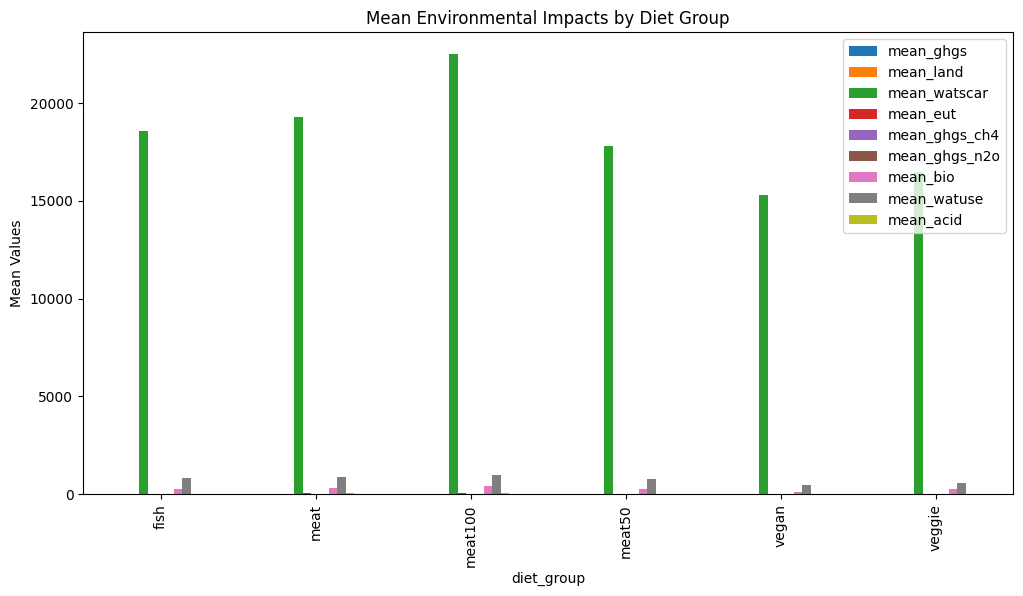

In [136]:
numeric_cols = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate the mean environmental impacts by diet group. We use .select_dtypes() to ensure we only include numeric columns in our mean calculation.
env_impacts = data.groupby('diet_group')[numeric_cols].mean()

# Plotting the results
env_impacts.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Environmental Impacts by Diet Group')
plt.ylabel('Mean Values')
plt.show()


In [137]:
print(data.columns)

Index(['mc_run_id', 'grouping', 'mean_ghgs', 'mean_land', 'mean_watscar',
       'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse',
       'mean_acid', 'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut',
       'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio', 'sd_watuse', 'sd_acid',
       'n_participants', 'sex', 'diet_group', 'age_group'],
      dtype='object')


In [138]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numeric and categorical features
numeric_features = ['mean_ghgs', 'water_use']  # Updated numeric features
categorical_features = ['diet_group', 'age_group', 'sex']

# Define a pipeline for numeric features: imputation + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())                    # Scale features to standardize
])

# Define a transformer for categorical features: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer that applies transformations to numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [139]:
# Define the only available numeric feature
numeric_features = ['mean_ghgs']

# Define a pipeline for numeric features: imputation + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())                    # Scale features to standardize
])

# Define categorical features
categorical_features = ['diet_group', 'age_group', 'sex']

# Define a transformer for categorical features: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer that applies transformations to numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the preprocessor to the DataFrame
data_cleaned = data.dropna(subset=['mean_ghgs'])  # Remove rows where 'mean_ghgs' is NaN

# Fit and transform the data using the complete preprocessing pipeline
data_preprocessed = preprocessor.fit_transform(data_cleaned)

# Example of how you might continue to use this data fo

In [140]:
# Display the environmental impact disparities
print(env_impacts.max() - env_impacts.min())


mean_ghgs           8.813304
mean_land          19.499366
mean_watscar     7184.735648
mean_eut           30.797598
mean_ghgs_ch4       2.288210
mean_ghgs_n2o       0.616104
mean_bio          297.632988
mean_watuse       524.203496
mean_acid          35.181156
dtype: float64


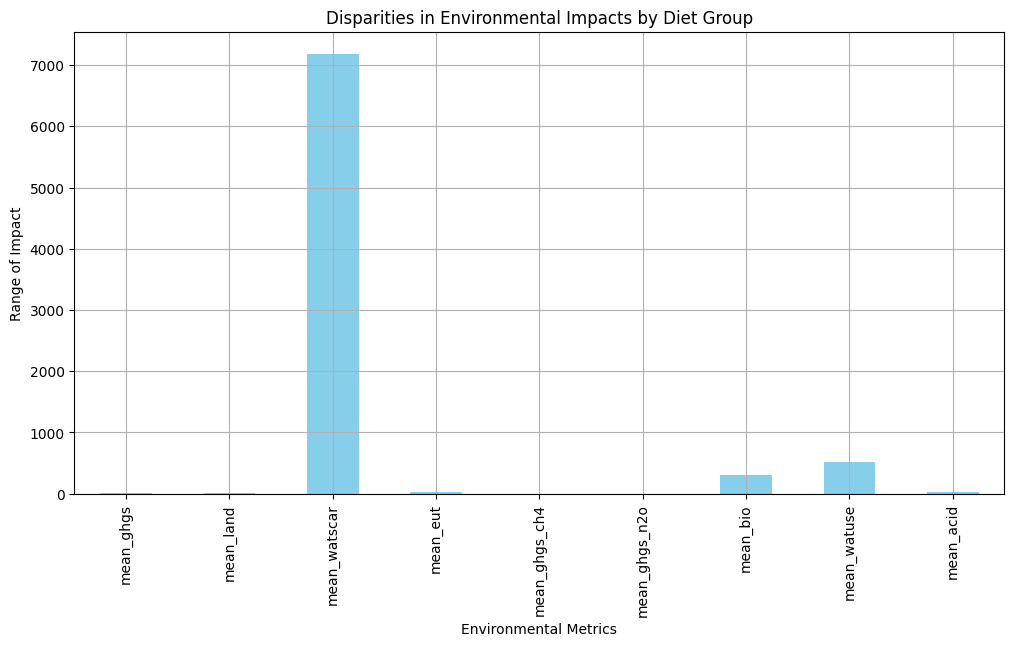

In [141]:
import matplotlib.pyplot as plt

# Creating a bar chart of the disparities
disparities = env_impacts.max() - env_impacts.min()
disparities.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Disparities in Environmental Impacts by Diet Group')
plt.ylabel('Range of Impact')
plt.xlabel('Environmental Metrics')
plt.grid(True)
plt.show()


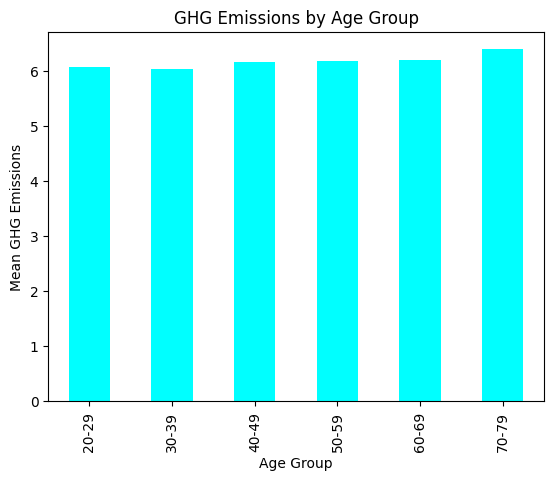

In [142]:
data['mean_ghgs'] = pd.to_numeric(data['mean_ghgs'], errors='coerce')

# Drop any rows that have NaN values in 'mean_ghgs' column after conversion
data.dropna(subset=['mean_ghgs'], inplace=True)

# Analyzing by age group
age_impacts = data.groupby('age_group')['mean_ghgs'].mean()

# Plotting the results
age_impacts.plot(kind='bar', color='cyan')
plt.title('GHG Emissions by Age Group')
plt.ylabel('Mean GHG Emissions')
plt.xlabel('Age Group')
plt.show()

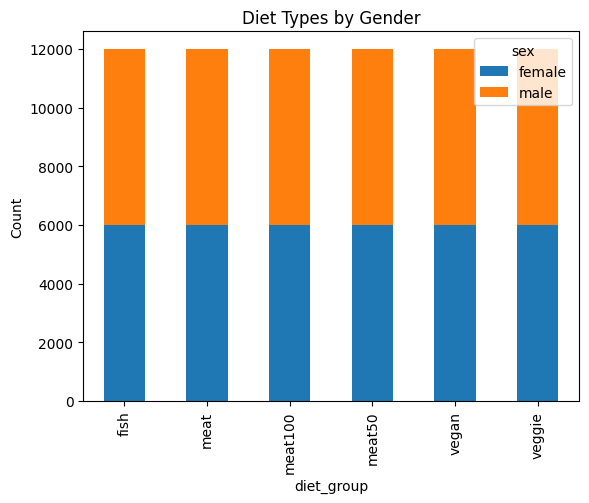

In [143]:
gender_diet = pd.crosstab(data['diet_group'], data['sex'])
gender_diet.plot(kind='bar', stacked=True)
plt.title('Diet Types by Gender')
plt.ylabel('Count')
plt.show()

In [144]:
# First, ensure that 'mean_ghgs' is a numeric column:
data['mean_ghgs'] = pd.to_numeric(data['mean_ghgs'], errors='coerce')
data.dropna(subset=['mean_ghgs'], inplace=True)  # Drop any rows that may have NaN in 'mean_ghgs' after conversion.

# Aggregate the data
grouped_data = data.groupby(['diet_group', 'age_group', 'sex'])['mean_ghgs'].mean().reset_index()
grouped_data['mean_ghgs'] = grouped_data['mean_ghgs'].round(2)  # Optionally round the mean values for cleaner presentation

# Save the aggregated data to a CSV file
grouped_data.to_csv('output.csv', index=False)


In [145]:
from google.colab import files

# Download the file to your local system
files.download('output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('/content/output (2).csv')

# Display the first few rows of the DataFrame to understand its structure
print(data.head())


  diet_group age_group     sex  mean_ghgs
0       fish     20-29  female       4.90
1       fish     20-29    male       5.66
2       fish     30-39  female       4.94
3       fish     30-39    male       5.33
4       fish     40-49  female       4.93


In [147]:
# Display the DataFrame's info to see column names and types
print(data.info())

# Display descriptive statistics to understand the range and distribution of numerical columns
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   diet_group  72 non-null     object 
 1   age_group   72 non-null     object 
 2   sex         72 non-null     object 
 3   mean_ghgs   72 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.4+ KB
None
       mean_ghgs
count  72.000000
mean    6.172639
std     2.809317
min     2.380000
25%     4.467500
50%     5.440000
75%     7.590000
max    12.260000


Version 3

Uniqueness fidnings

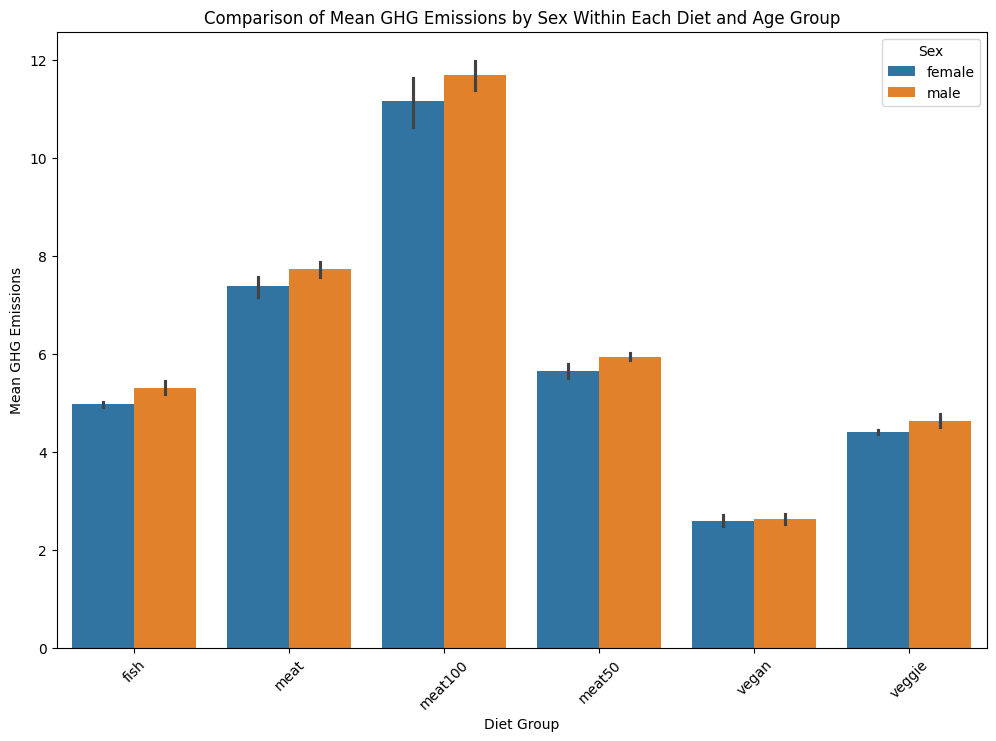

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Group data by diet_group, age_group, and sex, then calculate mean GHG emissions
grouped_data = data.groupby(['diet_group', 'age_group', 'sex'])['mean_ghgs'].mean().reset_index()

# Create a bar plot to compare emissions by sex within each diet and age group
plt.figure(figsize=(12, 8))
sns.barplot(x='diet_group', y='mean_ghgs', hue='sex', data=grouped_data)
plt.title('Comparison of Mean GHG Emissions by Sex Within Each Diet and Age Group')
plt.xlabel('Diet Group')
plt.ylabel('Mean GHG Emissions')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.show()


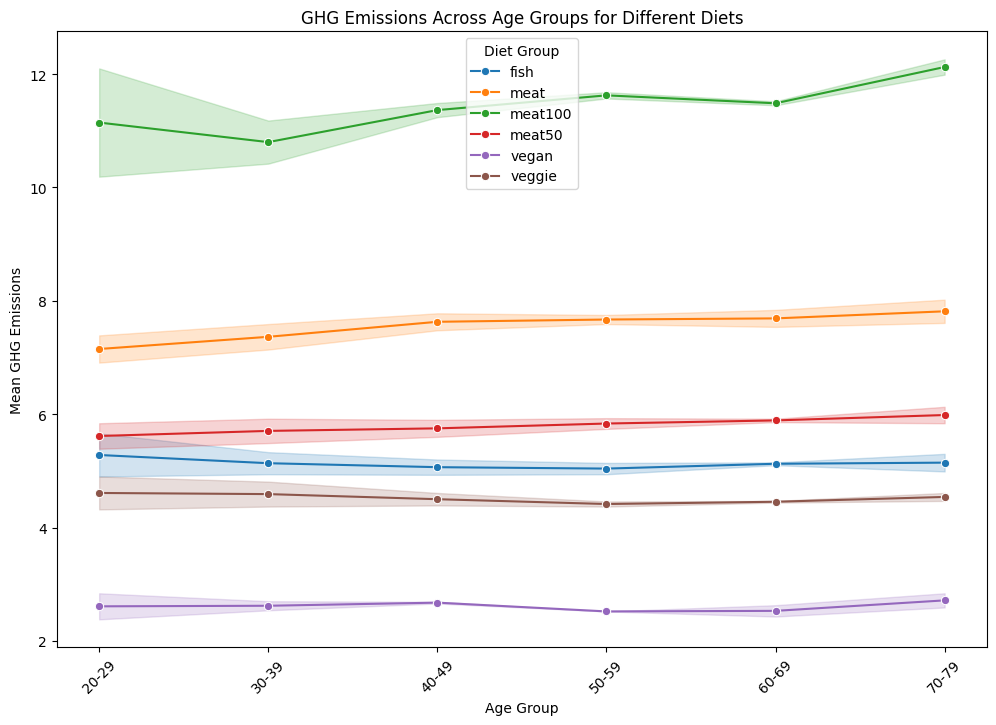

In [149]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='age_group', y='mean_ghgs', hue='diet_group', data=grouped_data, marker='o')
plt.title('GHG Emissions Across Age Groups for Different Diets')
plt.xlabel('Age Group')
plt.ylabel('Mean GHG Emissions')
plt.legend(title='Diet Group')
plt.xticks(rotation=45)  # Ensure age groups are readable
plt.show()


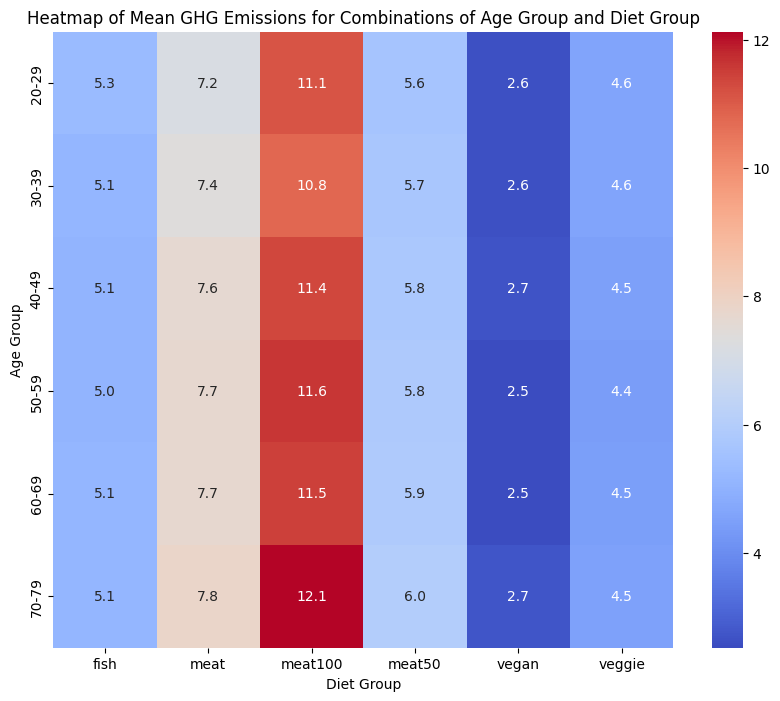

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use pivot_table instead of pivot for aggregation of duplicate entries
pivot_table = grouped_data.pivot_table(index="age_group", columns="diet_group", values="mean_ghgs", aggfunc='mean')

# Create a heatmap to visualize the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Heatmap of Mean GHG Emissions for Combinations of Age Group and Diet Group')
plt.xlabel('Diet Group')
plt.ylabel('Age Group')
plt.show()



In [151]:
# Encoding categorical variables
le = LabelEncoder()
data['diet_group_encoded'] = le.fit_transform(data['diet_group'])
data['age_group_encoded'] = le.fit_transform(data['age_group'])
data['sex_encoded'] = le.fit_transform(data['sex'])

# Preparing data for the model
X = data[['diet_group_encoded', 'age_group_encoded', 'sex_encoded']]
y = data['mean_ghgs']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the model: {mse:.2f}")


Mean Squared Error of the model: 9.29


In [152]:
from sklearn.preprocessing import PolynomialFeatures

# Example of adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Splitting the new dataset
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Re-fit the linear regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Mean Squared Error with Polynomial Features: {mse_poly:.2f}")


Mean Squared Error with Polynomial Features: 5.09


In [153]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to assess model performance
scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -scores.mean()
print(f"Cross-validated Mean Squared Error: {mean_mse:.2f}")


Cross-validated Mean Squared Error: 14.65


In [ ]:
import plotly.express as px

# Convert 'mean_ghgs' to numeric and drop any NaN values
data['mean_ghgs'] = pd.to_numeric(data['mean_ghgs'], errors='coerce')
data.dropna(subset=['mean_ghgs'], inplace=True)

# Aggregating data to find the mean GHG emissions for each combination of diet_group, age_group, and sex
aggregated_data = data.groupby(['diet_group', 'age_group', 'sex'])['mean_ghgs'].mean().reset_index()

# Create a treemap with enhanced styling
fig = px.treemap(
    aggregated_data,  # Use aggregated data
    path=['diet_group', 'age_group', 'sex'],  # Hierarchical levels
    values='mean_ghgs',  # Size of the blocks based on mean GHG emissions
    color='mean_ghgs',  # Color scale based on GHG emissions
    color_continuous_scale=px.colors.diverging.RdBu[::-1],  # Reversed Red to Blue color scale for better intensity at high values
    title='Comparative Treemap of GHG Emissions: Diet Groups Across Ages and Genders',
    template='plotly_dark',  # Dark theme for better contrast
    hover_data=['mean_ghgs'],  # Display mean GHG on hover
    height=600  # Adjust height for better display
)

# Customizing the layout for better visibility
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),  # Reducing margin to use space efficiently
    treemapcolorway=["red", "green", "blue"]  # Custom colorway for visual distinction
)

# Customizing the treemap text for clarity
fig.update_traces(
    textinfo="label+value+percent parent",  # Show label, value, and percentage from the parent node
    textfont_size=20,  # Increase text size for readability
    marker=dict(line=dict(width=2, color='DarkSlateGrey'))  # Borders between nodes
)

# Show the treemap
fig.show()


In [ ]:
# Save the interactive plot as an HTML file
plot_html = plot(fig, output_type='div', include_plotlyjs='cdn')

# Save the HTML content to a file
with open('interactive_treemap.html', 'w') as f:
    f.write(plot_html)

# Download the HTML file
from google.colab import files
files.download('interactive_treemap.html')